# Anomaly Detection using Scikit-Learn

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Isolation Forest

In [32]:
from sklearn.ensemble import IsolationForest
true_cov = np.array([[.8, .3],
                     [.3, .4]])
X = np.random.RandomState(0).multivariate_normal(mean=[0, 0],
                                                 cov=true_cov,
                                                 size=500)
X_test = np.array([[0, 0],[3, 3]])

In [34]:
clf = IsolationForest(random_state=0).fit(X)
clf.predict(X_test)

array([ 1, -1])

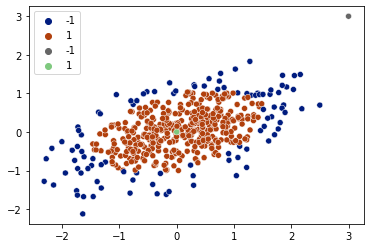

In [35]:
detections = clf.predict(X)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=detections, palette='dark')

detections = clf.predict(X_test)
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=detections, palette='Accent_r')

plt.legend()

### boundary

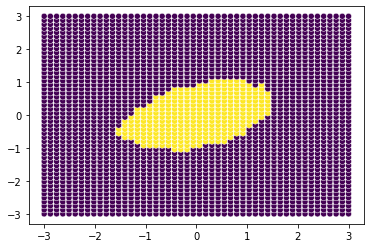

In [46]:

size=3
loc_points = np.linspace(-size,size)
all_points = np.array(np.meshgrid(loc_points, loc_points)).T.reshape(-1, 2)
points = clf.predict(all_points)

sns.scatterplot(x=all_points[...,0], y=all_points[...,1], hue=points,\
                palette='viridis',legend=False)
plt.show()

## Elliptic Envelope

In [28]:
from sklearn.covariance import EllipticEnvelope
true_cov = np.array([[.8, .3],
                     [.3, .4]])
X = np.random.RandomState(0).multivariate_normal(mean=[0, 0],
                                                 cov=true_cov,
                                                 size=500)
cov = EllipticEnvelope(random_state=0).fit(X)
# predict returns 1 for an inlier and -1 for an outlier

X_test = np.array([[0, 0],[3, 3]])

In [29]:
cov.covariance_

array([[0.74118335, 0.25357049],
       [0.25357049, 0.30531502]])

In [30]:
cov.location_

array([0.0813539 , 0.04279722])

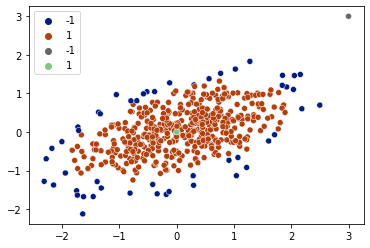

In [31]:
detections = cov.predict(X)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=detections, palette='dark')

detections = cov.predict(X_test)
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=detections, palette='Accent_r')

plt.legend()

### boundary

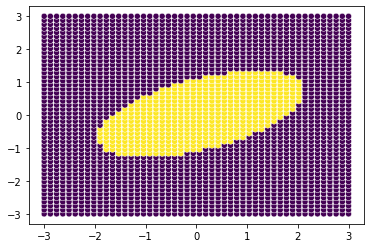

In [47]:

size=3
loc_points = np.linspace(-size,size)
all_points = np.array(np.meshgrid(loc_points, loc_points)).T.reshape(-1, 2)
points = cov.predict(all_points)

sns.scatterplot(x=all_points[...,0], y=all_points[...,1], hue=points,\
                palette='viridis',legend=False)
plt.show()